In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [4]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")


In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

Base.classes.keys()

['measurement', 'station']

In [6]:
# Assign the measurement class to a variable called `Measurement` and
# assign the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create a session
session = Session(engine)

In [8]:
# Close Session
session.close()

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.

# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.

dt.date(2017,8,23)-dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

precipitation_one_year = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=(dt.date(2017,8,23)-dt.timedelta(days=365))).all()
#precipitation_one_year

In [13]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df_precipitation_one_year = pd.DataFrame(precipitation_one_year,columns=['date','precipitation'])
# df_precipitation_one_year

In [14]:
# Sort the dataframe by date
sort_df_precipitation_one_year=df_precipitation_one_year.sort_values('date')
#sort_df_precipitation_one_year.head(10)

<function matplotlib.pyplot.show(close=None, block=None)>

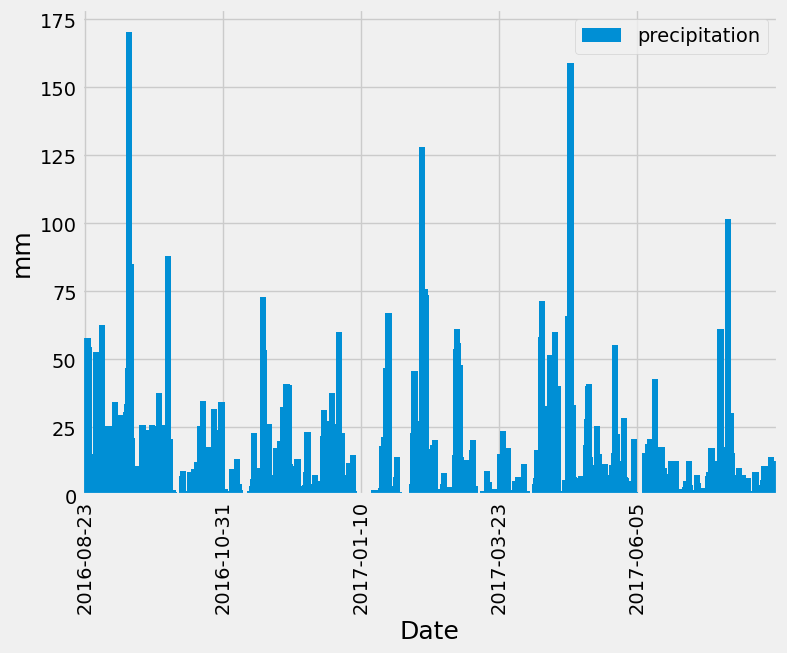

In [15]:
## Use Pandas Plotting with Matplotlib to plot the data

plt_precipitation = sort_df_precipitation_one_year.set_index('date').plot(kind='bar', width=20, figsize=(8,6))
plt.locator_params(axis='x', nbins=5)
plt_precipitation.grid(True)
plt.ylabel("mm", size=18)
plt.xlabel("Date", size=18)
plt.gca().yaxis.set_major_locator(MultipleLocator(25))
plt.savefig('Precipitation.png')
plt.show

In [16]:
# Use Pandas to calculate the summary statistics for the precipitation data
sort_df_precipitation_one_year.describe()

,precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


In [17]:
# Close Session
session.close()

# Exploratory Station Analysis

In [31]:
# Design a query to calculate the total number of stations in the dataset
no_station=session.query(func.count(Station.station)).all()
no_station

[(9,)]

In [32]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [33]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                filter(Measurement.station == "USC00519281").all()

[(12.2, 29.4, 22.03582251082252)]

In [34]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_last_12m = session.query(Measurement.station, Measurement.tobs).\
                filter(Measurement.station == "USC00519281").\
                filter(Measurement.date >= (dt.date(2017,8,23)-dt.timedelta(days=365))).all()

In [35]:
df_temperature_last_12m = pd.DataFrame(temperature_last_12m, columns=['station','tobs'])
df_temperature_last_12m.head()

df_temperature_last_12m.set_index('station', inplace=True)
df_temperature_last_12m.head()

,tobs
station,
USC00519281,25.0
USC00519281,25.0
USC00519281,26.7
USC00519281,26.7
USC00519281,23.9


<function matplotlib.pyplot.show(close=None, block=None)>

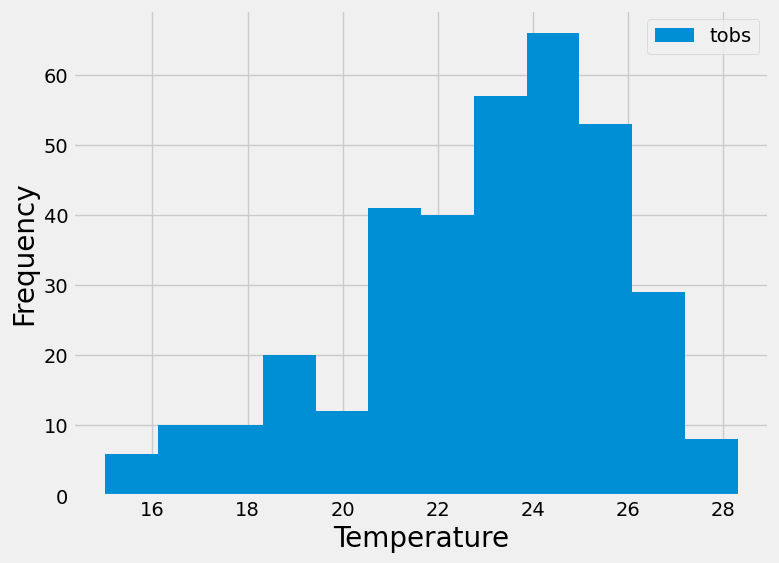

In [36]:
# Plot the results as a histogram with bins=12.
df_temperature_last_12m.plot.hist(by='station', bins=12, figsize=(8,6))
plt.grid(True)
plt.xlabel("Temperature", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.savefig('station histogram.png')
plt.show

# Close Session

In [37]:
# Close Session
session.close()
